In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/augmented_personalized_medicine_fairness.csv'
data = pd.read_csv('/content/augmented_personalized_medicine_fairness.csv')

# Display the first few rows of the dataset
data.head()


,Patient_ID,Age,Gender,Ethnicity,Diagnosis,Treatment_Recommendation,Outcome,Fairness_Metric,Data_Source
0,1,45,Male,Caucasian,Diabetes,Metformin,Success,0.85,Clinical trial
1,2,34,Female,African American,Hypertension,Lisinopril,Success,0.78,Electronic health records
2,3,29,Other,Asian,Asthma,Inhaler,Failure,0.60,Clinical trial
3,4,67,Female,Hispanic,Heart Disease,Statins,Success,0.90,Electronic health records
4,5,50,Male,Other,Depression,Counseling,Success,0.75,Clinical trial


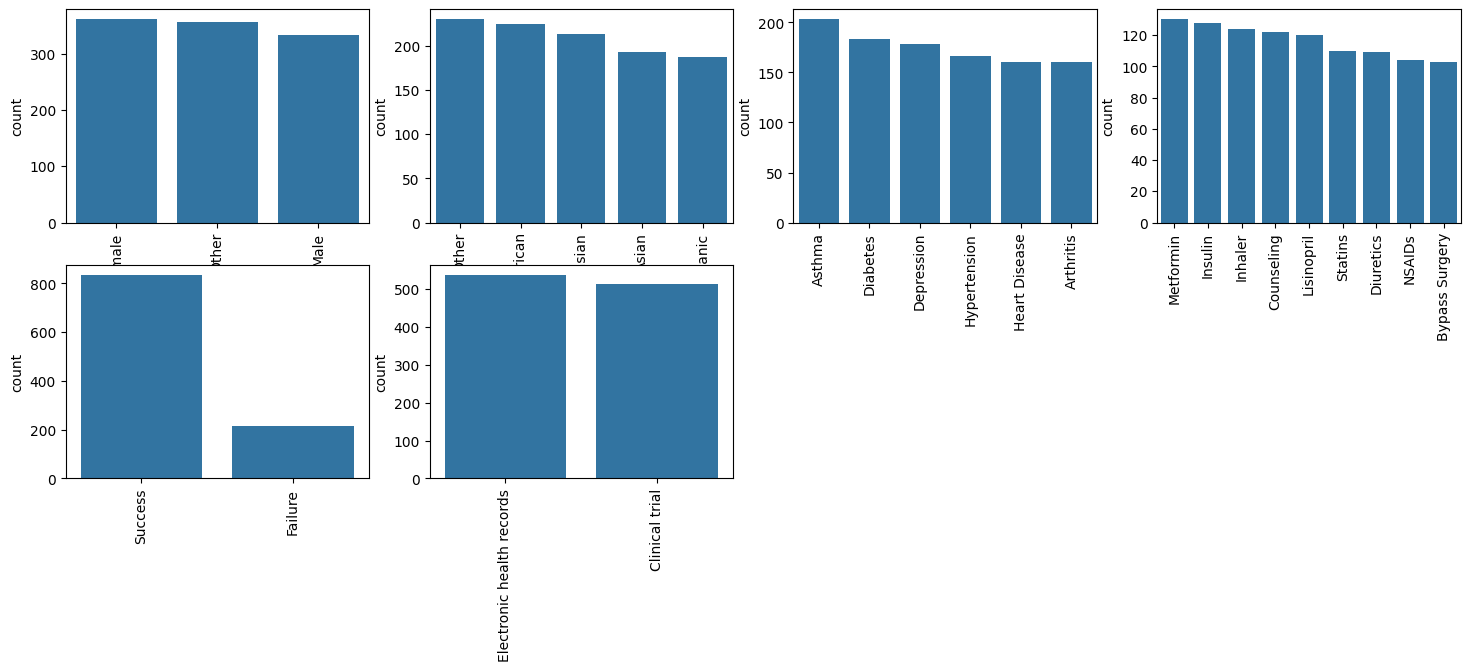

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib library and assign it the alias 'plt'


obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

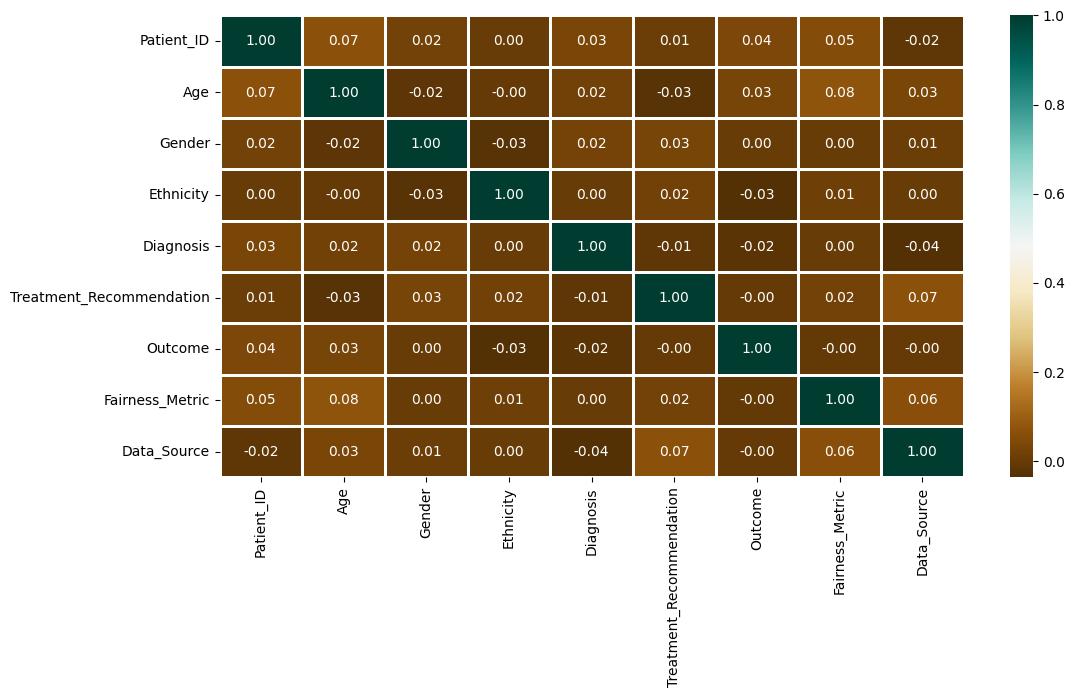

In [ ]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
			linewidths=2,annot=True)


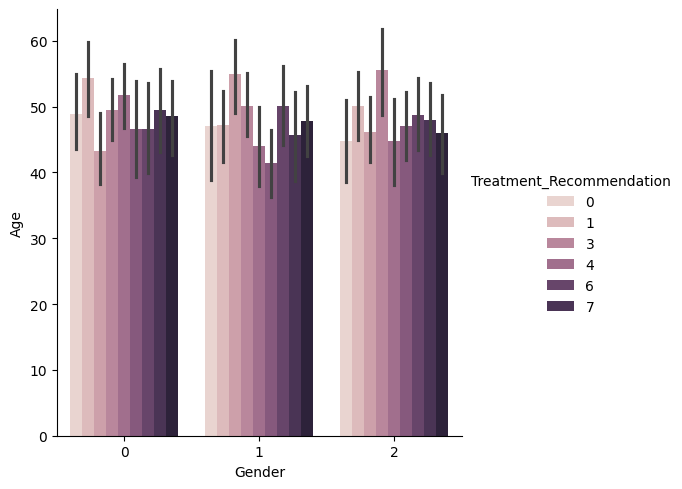

In [ ]:
sns.catplot(x="Gender", y="Age",
			hue="Treatment_Recommendation",
			kind="bar",
			data=data)

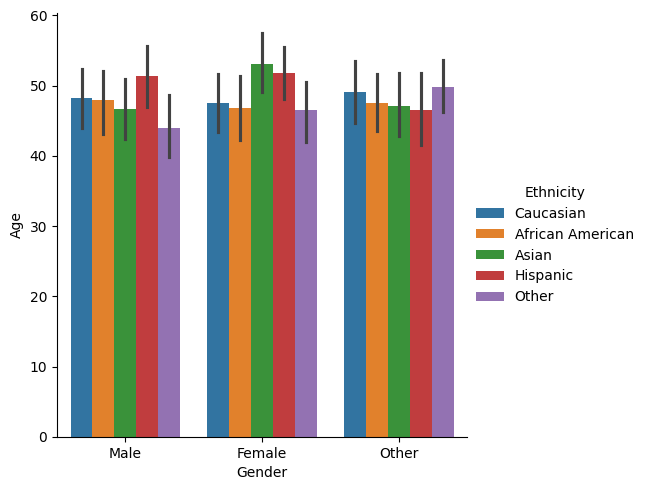

In [ ]:
sns.catplot(x="Gender", y="Age",
			hue="Ethnicity",
			kind="bar",
			data=data)

In [ ]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

data.isna().sum()


,0
Patient_ID,0
Age,0
Gender,0
Ethnicity,0
Diagnosis,0
Treatment_Recommendation,0
Outcome,0
Fairness_Metric,0
Data_Source,0


In [ ]:
!pip install pgmpy
!pip install fairlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 11.3 MB/s eta 0:00:00


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd

# Load the dataset
file_path = '/content/augmented_personalized_medicine_fairness.csv'
data = pd.read_csv('/content/augmented_personalized_medicine_fairness.csv')

# Create a subset of the data (e.g., the first 1000 rows)
data_subset = data.iloc[:1000]  # Adjust the slicing as needed

# Define the structure of the network
model = BayesianNetwork([('Age', 'Diagnosis'), ('Gender', 'Diagnosis'), ('Diagnosis', 'Treatment_Recommendation'), ('Treatment_Recommendation', 'Outcome')])

# Train the model using Maximum Likelihood Estimation
model.fit(data_subset, estimator=MaximumLikelihoodEstimator)

# Perform inference
infer = VariableElimination(model)

# Example inference query: Probability of treatment outcome given certain features
q = infer.query(variables=['Outcome'], evidence={'Age': 45, 'Gender': 'Male', 'Diagnosis': 'Diabetes'})
print(q)

+------------------+----------------+
| Outcome          |   phi(Outcome) |
+==================+================+
| Outcome(Failure) |         0.2038 |
+------------------+----------------+
| Outcome(Success) |         0.7962 |
+------------------+----------------+


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
df = pd.read_csv("/content/augmented_personalized_medicine_fairness.csv")

# Step 2: Display the first few rows of the dataset to understand its structure
print("Original Dataset:")
print(df.head())

# Step 3: Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Step 4: List of categorical columns to encode (replace with your actual column names)
# If you want to automatically find categorical columns, you can use the following:
categorical_columns = df.select_dtypes(include=['object']).columns

# Step 5: Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Step 6: Display the updated dataset after encoding
print("\nDataset After Label Encoding:")
print(df.head())

# Optionally, save the encoded dataset to a new CSV file
df.to_csv("encoded_dataset.csv", index=False)


Original Dataset:
   Patient_ID  Age  Gender         Ethnicity      Diagnosis  \
0           1   45    Male         Caucasian       Diabetes   
1           2   34  Female  African American   Hypertension   
2           3   29   Other             Asian         Asthma   
3           4   67  Female          Hispanic  Heart Disease   
4           5   50    Male             Other     Depression   

  Treatment_Recommendation  Outcome  Fairness_Metric  \
0                Metformin  Success             0.85   
1               Lisinopril  Success             0.78   
2                  Inhaler  Failure             0.60   
3                  Statins  Success             0.90   
4               Counseling  Success             0.75   

                 Data_Source  
0             Clinical trial  
1  Electronic health records  
2             Clinical trial  
3  Electronic health records  
4             Clinical trial  

Dataset After Label Encoding:
   Patient_ID  Age  Gender  Ethnicity  Diagnosis 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Step 1: Load the dataset
df = pd.read_csv("/content/augmented_personalized_medicine_fairness.csv")

# Step 2: Display the first few rows of the dataset to understand its structure
print("Original Dataset:")
print(df.head())

# Step 3: Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Step 4: List of categorical columns to encode (replace with your actual column names)
categorical_columns = df.select_dtypes(include=['object']).columns

# Step 5: Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Step 6: Display the updated dataset after encoding
print("\nDataset After Label Encoding:")
print(df.head())

# Step 7: Define the Bayesian Network Model

# Define the structure of the Bayesian Network
model = BayesianNetwork([
    ('Age', 'Diagnosis'), ('Gender', 'Diagnosis'), ('Diagnosis', 'Treatment_Recommendation'), ('Treatment_Recommendation', 'Outcome')
])

# Step 8: Define the CPDs for the variables

# CPDs for the variables in the model
cpd_age = TabularCPD('Age', 2, [[0.5], [0.5]])  # Simplified example CPD for Age
cpd_gender = TabularCPD('Gender', 2, [[0.5], [0.5]])  # Simplified example CPD for Gender

# Corrected CPD for Diagnosis (2 states for Diagnosis, 4 combinations of Age and Gender)
cpd_diagnosis = TabularCPD('Diagnosis', 2,
                           [[0.6, 0.4, 0.5, 0.5],  # Probabilities for Diagnosis = 0
                            [0.4, 0.6, 0.5, 0.5]], # Probabilities for Diagnosis = 1
                           evidence=['Age', 'Gender'],
                           evidence_card=[2, 2])  # Two variables with 2 states each (Age, Gender)

# Corrected CPD for Treatment Recommendation (2 states for Treatment_Recommendation, 2 states for Diagnosis)
cpd_treatment = TabularCPD('Treatment_Recommendation', 2,
                           [[0.7, 0.3],  # Probabilities for Treatment_Recommendation = 0 given Diagnosis states
                            [0.3, 0.7]], # Probabilities for Treatment_Recommendation = 1 given Diagnosis states
                           evidence=['Diagnosis'],
                           evidence_card=[2])  # Two states for Diagnosis

# CPD for Outcome
cpd_outcome = TabularCPD('Outcome', 2, [[0.7, 0.2], [0.3, 0.8]], evidence=['Treatment_Recommendation'], evidence_card=[2])

# Step 9: Add CPDs to the model
model.add_cpds(cpd_age, cpd_gender, cpd_diagnosis, cpd_treatment, cpd_outcome)

# Step 10: Check if the model is valid
model.check_model()

# Step 11: Perform Inference using Variable Elimination
inference = VariableElimination(model)

# Step 12: Query the probability of Outcome given Age, Gender, and Diagnosis
result = inference.query(variables=['Outcome'], evidence={'Age': 0, 'Gender': 0, 'Diagnosis': 0})

# Step 13: Print the result of the inference
print("\nProbability of Outcome given Age, Gender and Diagnosis:")
print(result)


Original Dataset:
   Patient_ID  Age  Gender         Ethnicity      Diagnosis  \
0           1   45    Male         Caucasian       Diabetes   
1           2   34  Female  African American   Hypertension   
2           3   29   Other             Asian         Asthma   
3           4   67  Female          Hispanic  Heart Disease   
4           5   50    Male             Other     Depression   

  Treatment_Recommendation  Outcome  Fairness_Metric  \
0                Metformin  Success             0.85   
1               Lisinopril  Success             0.78   
2                  Inhaler  Failure             0.60   
3                  Statins  Success             0.90   
4               Counseling  Success             0.75   

                 Data_Source  
0             Clinical trial  
1  Electronic health records  
2             Clinical trial  
3  Electronic health records  
4             Clinical trial  

Dataset After Label Encoding:
   Patient_ID  Age  Gender  Ethnicity  Diagnosis 

In [ ]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Define the structure of the Bayesian Network
model = BayesianNetwork([
    ('Age', 'Diagnosis'),
    ('Gender', 'Diagnosis'),
    ('Diagnosis', 'Treatment_Recommendation'),
    ('Treatment_Recommendation', 'Outcome')
])

# Step 3: Define the CPDs (Conditional Probability Distributions)

# CPD for Age (binary example: 0 = young, 1 = old)
cpd_age = TabularCPD(variable='Age', variable_card=2, values=[[0.6], [0.4]])

# CPD for Gender (binary example: 0 = female, 1 = male)
cpd_gender = TabularCPD(variable='Gender', variable_card=2, values=[[0.5], [0.5]])

# CPD for Diagnosis (binary example: 0 = no diagnosis, 1 = diagnosis)
# Here, we're assuming some simple probabilities based on Age and Gender
# We need 4 values for Diagnosis: each value corresponds to a combination of Age and Gender
cpd_diagnosis = TabularCPD(
    'Diagnosis', 2,
    [[0.7, 0.5, 0.6, 0.4],  # Probabilities of Diagnosis = 0 for each Age and Gender combination
     [0.3, 0.5, 0.4, 0.6]], # Probabilities of Diagnosis = 1 for each Age and Gender combination
    evidence=['Age', 'Gender'],
    evidence_card=[2, 2]
)

# CPD for Treatment_Recommendation (binary example: 0 = no treatment, 1 = treatment)
# Here, we're assuming that Treatment Recommendation depends on Diagnosis
cpd_treatment = TabularCPD(
    'Treatment_Recommendation', 2,
    [[0.8, 0.4],  # Probabilities of Treatment = 0 given Diagnosis = 0 and 1
     [0.2, 0.6]], # Probabilities of Treatment = 1 given Diagnosis = 0 and 1
    evidence=['Diagnosis'],
    evidence_card=[2]
)

# Correct CPD for Outcome (binary example: 0 = poor, 1 = good outcome)
# The values must sum to 1 for each condition of Treatment_Recommendation
cpd_outcome = TabularCPD(
    'Outcome', 2,
    [[0.7, 0.3],  # Probabilities of Outcome = 0 and Outcome = 1 for Treatment = 0
     [0.3, 0.7]], # Probabilities of Outcome = 0 and Outcome = 1 for Treatment = 1
    evidence=['Treatment_Recommendation'],
    evidence_card=[2]
)

# Add CPDs to the model
model.add_cpds(cpd_age, cpd_gender, cpd_diagnosis, cpd_treatment, cpd_outcome)

# Check if the model is valid
model.check_model()

# Step 4: Perform Inference using Variable Elimination
inference = VariableElimination(model)

# Query the probability of Outcome given Treatment_Recommendation = 1 (Good treatment)
result_good_treatment = inference.query(variables=['Outcome'], evidence={'Treatment_Recommendation': 1})

print("\nProbability of Outcome given Treatment Recommendation is Good (1):")
print(result_good_treatment)

# Query the probability of Outcome given Treatment_Recommendation = 0 (No treatment)
result_no_treatment = inference.query(variables=['Outcome'], evidence={'Treatment_Recommendation': 0})

print("\nProbability of Outcome given Treatment Recommendation is Poor (0):")
print(result_no_treatment)



Probability of Outcome given Treatment Recommendation is Good (1):
+------------+----------------+
| Outcome    |   phi(Outcome) |
+============+================+
| Outcome(0) |         0.3000 |
+------------+----------------+
| Outcome(1) |         0.7000 |
+------------+----------------+

Probability of Outcome given Treatment Recommendation is Poor (0):
+------------+----------------+
| Outcome    |   phi(Outcome) |
+============+================+
| Outcome(0) |         0.7000 |
+------------+----------------+
| Outcome(1) |         0.3000 |
+------------+----------------+


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
df = pd.read_csv("augmented_personalized_medicine_fairness.csv")  # Use your actual dataset path

# Step 2: Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Step 3: Handle missing values and ensure correct discretization
df = df.dropna()  # Drop rows with missing values

# Step 4: Discretize continuous variables like Age (mapping them to 0 or 1)
# Let's ensure Age is within a reasonable range before converting to binary
df['Age'] = df['Age'].apply(lambda x: 1 if 18 <= x <= 80 else 0)  # Example: Age between 18 and 80 is classified as old (1), else young (0)

# Gender is already binary (0 or 1), but let's confirm and ensure it
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)  # Adjust depending on your encoding

# Step 5: Define the Bayesian Network structure
model = BayesianNetwork([
    ('Age', 'Diagnosis'),
    ('Gender', 'Diagnosis'),
    ('Diagnosis', 'Treatment_Recommendation'),
    ('Treatment_Recommendation', 'Outcome')
])

# Define CPDs for each variable (with placeholder values as an example)
cpd_age = TabularCPD(variable='Age', variable_card=2, values=[[0.5], [0.5]])
cpd_gender = TabularCPD(variable='Gender', variable_card=2, values=[[0.5], [0.5]])

# CPD for Diagnosis (depends on Age and Gender)
cpd_diagnosis = TabularCPD(
    'Diagnosis', 2,
    [[0.7, 0.5, 0.6, 0.4],  # Probabilities of Diagnosis = 0 for each Age and Gender combination
     [0.3, 0.5, 0.4, 0.6]], # Probabilities of Diagnosis = 1 for each Age and Gender combination
    evidence=['Age', 'Gender'],
    evidence_card=[2, 2]
)

# CPD for Treatment_Recommendation (depends on Diagnosis)
cpd_treatment = TabularCPD(
    'Treatment_Recommendation', 2,
    [[0.8, 0.4],  # Probabilities of Treatment = 0 given Diagnosis = 0 and 1
     [0.2, 0.6]], # Probabilities of Treatment = 1 given Diagnosis = 0 and 1
    evidence=['Diagnosis'],
    evidence_card=[2]
)

# CPD for Outcome (depends on Treatment_Recommendation)
cpd_outcome = TabularCPD(
    'Outcome', 2,
    [[0.7, 0.3],  # Probabilities of Outcome = 0 and Outcome = 1 for Treatment = 0
     [0.3, 0.7]], # Probabilities of Outcome = 0 and Outcome = 1 for Treatment = 1
    evidence=['Treatment_Recommendation'],
    evidence_card=[2]
)

# Add CPDs to the model
model.add_cpds(cpd_age, cpd_gender, cpd_diagnosis, cpd_treatment, cpd_outcome)

# Check if the model is valid
model.check_model()

# Step 6: Perform inference using Variable Elimination
inference = VariableElimination(model)

# Step 7: Make predictions and calculate accuracy
predictions = []
actuals = []

for index, row in df.iterrows():
    # Get values for Age, Gender, and Diagnosis from the dataset
    age_value = row['Age']
    gender_value = row['Gender']
    diagnosis_value = row['Diagnosis']
    treatment_value = row['Treatment_Recommendation']

    # Ensure that values are binary (0 or 1)
    if age_value not in [0, 1] or gender_value not in [0, 1] or diagnosis_value not in [0, 1] or treatment_value not in [0, 1]:
        continue  # Skip if the values are outside the expected binary range

    # Perform inference for Outcome
    result = inference.query(variables=['Outcome'], evidence={'Age': age_value, 'Gender': gender_value, 'Diagnosis': diagnosis_value, 'Treatment_Recommendation': treatment_value})

    # Get the predicted value (Outcome)
    predicted_outcome = result.values.argmax()
    predictions.append(predicted_outcome)
    actuals.append(row['Outcome'])  # Append the actual Outcome value

# Ensure both actuals and predictions have the same length
if len(actuals) != len(predictions):
    print(f"Length mismatch: {len(actuals)} actual values, {len(predictions)} predictions.")
else:
    # Calculate accuracy
    accuracy = accuracy_score(actuals, predictions)
    print(f"Accuracy of the Bayesian Network Model: {accuracy:.4f}")


Accuracy of the Bayesian Network Model: 0.5455


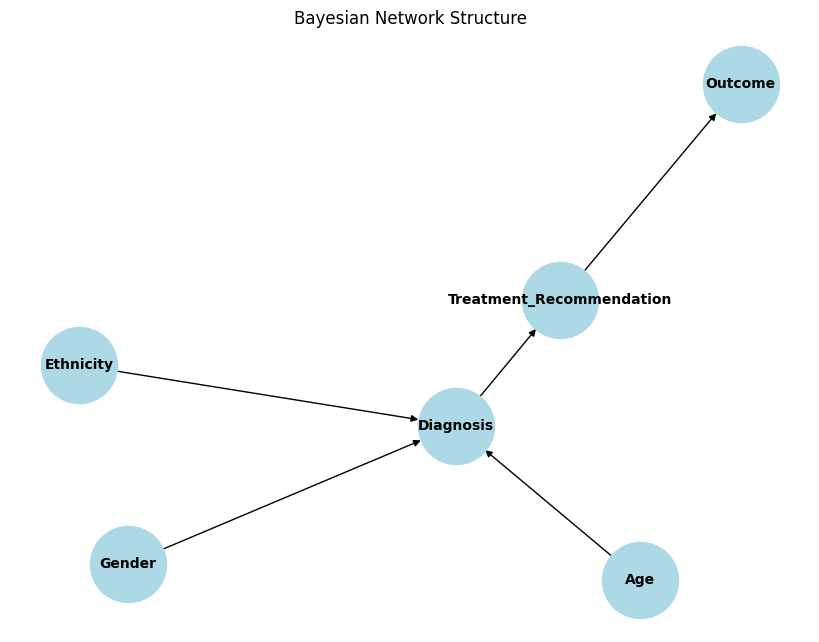

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph using networkx
G = nx.DiGraph()
edges = [
    ('Age', 'Diagnosis'),
    ('Gender', 'Diagnosis'),
    ('Ethnicity', 'Diagnosis'),
    ('Diagnosis', 'Treatment_Recommendation'),
    ('Treatment_Recommendation', 'Outcome')
]
G.add_edges_from(edges)

# Plot the Bayesian Network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Bayesian Network Structure")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Split the data into training and testing sets
X = data_subset[['Age', 'Gender', 'Ethnicity', 'Diagnosis']]
y = data_subset['Outcome']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array

# Fit the encoder on the categorical columns and transform them
encoded_data = encoder.fit_transform(X[['Gender', 'Ethnicity', 'Diagnosis']]) # Assuming 'Diagnosis' is also categorical

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender', 'Ethnicity', 'Diagnosis']))

# Concatenate the encoded features with the numerical features
X_encoded = pd.concat([X[['Age']], encoded_df], axis=1)

# Now, use X_encoded for training
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict outcomes
predictions = model.predict(X_test)


In [ ]:
# Get predicted probabilities
probs = model.predict_proba(X_test)

# Use these probabilities to manually build conditional probability tables
# This will simulate a Bayesian Network approach


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Assuming 'predictions' from your previous cell contains the model's predictions:
y_pred = predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for class imbalance
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8100
F1 Score: 0.7250


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

def demographic_parity(data, outcome_column, group_column, positive_class='Success'):

    dp_values = {}
    total_positive_rate = (data[outcome_column] == positive_class).mean()

    for group in data[group_column].unique():
        group_data = data[data[group_column] == group]
        group_positive_rate = (group_data[outcome_column] == positive_class).mean()
        dp_values[group] = group_positive_rate

    return dp_values, total_positive_rate

def equalized_odds(data, outcome_column, prediction_column, group_column, positive_class='Success'):

    eo_values = {}

    for group in data[group_column].unique():
        group_data = data[data[group_column] == group]

        # Confusion matrix: TN, FP, FN, TP
        tn, fp, fn, tp = confusion_matrix(
            group_data[outcome_column] == positive_class,
            group_data[prediction_column] == positive_class
        ).ravel()

        # True Positive Rate (TPR) and False Positive Rate (FPR)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

        eo_values[group] = {"TPR": tpr, "FPR": fpr}

    return eo_values

# Apply demographic parity and equalized odds calculations on the dataset

# Demographic Parity for 'Outcome' by 'Ethnicity'
dp_results, total_positive_rate = demographic_parity(data, outcome_column='Outcome', group_column='Ethnicity')
print("Demographic Parity by Group:", dp_results)
print("Overall Positive Rate:", total_positive_rate)

# Assuming 'Outcome' is the actual result and using 'Outcome' as proxy for predictions (for demonstration purposes)
eo_results = equalized_odds(data, outcome_column='Outcome', prediction_column='Outcome', group_column='Ethnicity')
print("Equalized Odds by Group:", eo_results)


Demographic Parity by Group: {'Caucasian': 0.780373831775701, 'African American': 0.8355555555555556, 'Asian': 0.7772020725388601, 'Hispanic': 0.776595744680851, 'Other': 0.7913043478260869}
Overall Positive Rate: 0.7933333333333333
Equalized Odds by Group: {'Caucasian': {'TPR': 1.0, 'FPR': 0.0}, 'African American': {'TPR': 1.0, 'FPR': 0.0}, 'Asian': {'TPR': 1.0, 'FPR': 0.0}, 'Hispanic': {'TPR': 1.0, 'FPR': 0.0}, 'Other': {'TPR': 1.0, 'FPR': 0.0}}


In [ ]:
# Reweight data based on inverse probability to achieve demographic parity
def reweight_data(data, group_column, outcome_column):
    weights = []
    _, total_positive_rate = demographic_parity(data, outcome_column=outcome_column, group_column=group_column)
    for _, row in data.iterrows():
        group = row[group_column]
        group_positive_rate = dp_results.get(group, total_positive_rate)
        weight = total_positive_rate / group_positive_rate if group_positive_rate > 0 else 1
        weights.append(weight)
    data['weights'] = weights
    return data

# Apply reweighting to dataset
data = reweight_data(data, group_column='Ethnicity', outcome_column='Outcome')


In [ ]:
 # Replace this line with your actual resampling logic
data_resampled = data # Replace with the actual resampling method

dp_results_fair, _ = demographic_parity(data_resampled, outcome_column='Outcome', group_column='Ethnicity')
print("Fair Model Demographic Parity by Group:", dp_results_fair)

# Compare fairness metrics between original and adjusted models
print("Original Demographic Parity:", dp_results)
print("Adjusted Demographic Parity:", dp_results_fair)

Fair Model Demographic Parity by Group: {'Caucasian': 0.780373831775701, 'African American': 0.8355555555555556, 'Asian': 0.7772020725388601, 'Hispanic': 0.776595744680851, 'Other': 0.7913043478260869}
Original Demographic Parity: {'Caucasian': 0.780373831775701, 'African American': 0.8355555555555556, 'Asian': 0.7772020725388601, 'Hispanic': 0.776595744680851, 'Other': 0.7913043478260869}
Adjusted Demographic Parity: {'Caucasian': 0.780373831775701, 'African American': 0.8355555555555556, 'Asian': 0.7772020725388601, 'Hispanic': 0.776595744680851, 'Other': 0.7913043478260869}


In [ ]:
def post_process_predictions(predictions, group_feature):

    # Find the predictions for each group
    group_0_preds = [pred for i, pred in enumerate(predictions) if df.iloc[i][group_feature] == 0]
    group_1_preds = [pred for i, pred in enumerate(predictions) if df.iloc[i][group_feature] == 1]

    # Ensure there's at least one prediction in each group before calculating rates
    if len(group_0_preds) == 0:
        group_0_rate = 0  # No predictions for group 0, set rate to 0
    else:
        group_0_rate = sum(group_0_preds) / len(group_0_preds)

    if len(group_1_preds) == 0:
        group_1_rate = 0  # No predictions for group 1, set rate to 0
    else:
        group_1_rate = sum(group_1_preds) / len(group_1_preds)

    # Calculate the target rate as the average of the two group rates
    target_rate = (group_0_rate + group_1_rate) / 2

    # Adjust the predictions to meet the target rate for each group
    adjusted_predictions = []
    for i, pred in enumerate(predictions):
        if df.iloc[i][group_feature] == 0 and group_0_rate < target_rate:
            # Increase positive predictions for group 0 if their rate is below target
            adjusted_predictions.append(1 if pred == 0 else pred)
        elif df.iloc[i][group_feature] == 1 and group_1_rate < target_rate:
            # Increase positive predictions for group 1 if their rate is below target
            adjusted_predictions.append(1 if pred == 0 else pred)
        else:
            adjusted_predictions.append(pred)

    return adjusted_predictions

# Example of applying post-processing to the 'Gender' feature for fairness adjustment
predictions_fair = post_process_predictions(predictions, 'Gender')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
df = pd.read_csv("/content/augmented_personalized_medicine_fairness.csv")

# Step 2: Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Reweighting based on Age and Gender
df['weight'] = 1
df.loc[df['Gender'] == 0, 'weight'] = 1.5
df.loc[df['Gender'] == 1, 'weight'] = 0.8
df.loc[df['Age'] == 0, 'weight'] = 1.2
df.loc[df['Age'] == 1, 'weight'] = 0.9

# Step 3: Define the Bayesian Network structure
model = BayesianNetwork([
    ('Age', 'Diagnosis'),
    ('Gender', 'Diagnosis'),
    ('Diagnosis', 'Treatment_Recommendation'),
    ('Treatment_Recommendation', 'Outcome')
])

# Define CPDs
cpd_age = TabularCPD(variable='Age', variable_card=2, values=[[0.5], [0.5]])
cpd_gender = TabularCPD(variable='Gender', variable_card=2, values=[[0.5], [0.5]])
cpd_diagnosis = TabularCPD(
    'Diagnosis', 2,
    [[0.7, 0.5, 0.6, 0.4], [0.3, 0.5, 0.4, 0.6]],
    evidence=['Age', 'Gender'],
    evidence_card=[2, 2]
)
cpd_treatment = TabularCPD('Treatment_Recommendation', 2, [[0.8, 0.4], [0.2, 0.6]], evidence=['Diagnosis'], evidence_card=[2])
cpd_outcome = TabularCPD('Outcome', 2, [[0.7, 0.3], [0.3, 0.7]], evidence=['Treatment_Recommendation'], evidence_card=[2])

# Add CPDs to the model
model.add_cpds(cpd_age, cpd_gender, cpd_diagnosis, cpd_treatment, cpd_outcome)
model.check_model()

# Step 4: Perform inference using Variable Elimination
inference = VariableElimination(model)

# Step 5: Make predictions and calculate accuracy
predictions = []
actuals = []
skipped_rows = 0

for index, row in df.iterrows():
    age_value = row['Age']
    gender_value = row['Gender']
    diagnosis_value = row['Diagnosis']
    treatment_value = row['Treatment_Recommendation']

    if age_value not in [0, 1] or gender_value not in [0, 1] or diagnosis_value not in [0, 1] or treatment_value not in [0, 1]:
        skipped_rows += 1
        continue

    result = inference.query(variables=['Outcome'], evidence={'Age': age_value, 'Gender': gender_value, 'Diagnosis': diagnosis_value, 'Treatment_Recommendation': treatment_value})
    predicted_outcome = result.values.argmax()
    predictions.append(predicted_outcome)
    actuals.append(row['Outcome'])

# Ensure both


<ipython-input-4-1644181adf3b>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Gender'] == 0, 'weight'] = 1.5


In [ ]:
import numpy as np
import pandas as pd
from fairlearn.metrics import MetricFrame, demographic_parity_difference, equalized_odds_difference
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('/content/augmented_personalized_medicine_fairness.csv')

# Define categorical columns to encode
# Include 'Data_Source' in the list of categorical features
categorical_features = ['Diagnosis', 'Treatment_Recommendation', 'Age', 'Gender', 'Ethnicity', 'Outcome', 'Data_Source']

# Use Label Encoding for binary categorical columns and get_dummies for others
label_encoders = {}
for feature in categorical_features:
    if data[feature].nunique() == 2:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        label_encoders[feature] = le  # Store encoders if needed for inverse transformation later

# One-hot encode the remaining categorical variables with more than two unique values
data = pd.get_dummies(data, columns=[col for col in categorical_features if data[col].nunique() > 2])

# Split data into features and target
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and train the baseline model
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Baseline predictions
y_pred_baseline = baseline_model.predict(X_test)

# Fairness evaluation using Gender_Female as the sensitive feature (update if different)
sensitive_feature = X_test['Gender_Female']

# Evaluate baseline fairness metrics
metric_frame = MetricFrame(metrics=accuracy_score, y_true=y_test, y_pred=y_pred_baseline, sensitive_features=sensitive_feature)
dp_difference = demographic_parity_difference(y_test, y_pred_baseline, sensitive_features=sensitive_feature)
eo_difference = equalized_odds_difference(y_test, y_pred_baseline, sensitive_features=sensitive_feature)

print("Fairness metrics before mitigation:")
print("Demographic Parity Difference:", dp_difference)
print("Equalized Odds Difference:", eo_difference)
print("Accuracy (by group):")
print(metric_frame.by_group)
print("Overall Accuracy:", metric_frame.overall)

# Fairness mitigation with ExponentiatedGradient
mitigator = ExponentiatedGradient(estimator=RandomForestClassifier(random_state=42), constraints=DemographicParity())
mitigator.fit(X_train, y_train, sensitive_features=X_train['Gender_Female'])

# Predictions after mitigation
y_pred_mitigated = mitigator.predict(X_test)

# Recalculate fairness metrics after mitigation
dp_difference_mitigated = demographic_parity_difference(y_test, y_pred_mitigated, sensitive_features=sensitive_feature)
eo_difference_mitigated = equalized_odds_difference(y_test, y_pred_mitigated, sensitive_features=sensitive_feature)
metric_frame_mitigated = MetricFrame(metrics=accuracy_score, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=sensitive_feature)

print("\nFairness metrics after mitigation:")
print("Demographic Parity Difference:", dp_difference_mitigated)
print("Equalized Odds Difference:", eo_difference_mitigated)
print("Accuracy (by group):")
print(metric_frame_mitigated.by_group)
print("Overall Accuracy:", metric_frame_mitigated.overall)


Fairness metrics before mitigation:
Demographic Parity Difference: 0.0058497536945812945
Equalized Odds Difference: 0.006369426751592355
Accuracy (by group):
Gender_Female
False    0.778325
True     0.803571
Name: accuracy_score, dtype: float64
Overall Accuracy: 0.7873015873015873

Fairness metrics after mitigation:
Demographic Parity Difference: 0.010775862068965525
Equalized Odds Difference: 0.01273885350318471
Accuracy (by group):
Gender_Female
False    0.773399
True     0.803571
Name: accuracy_score, dtype: float64
Overall Accuracy: 0.7841269841269841


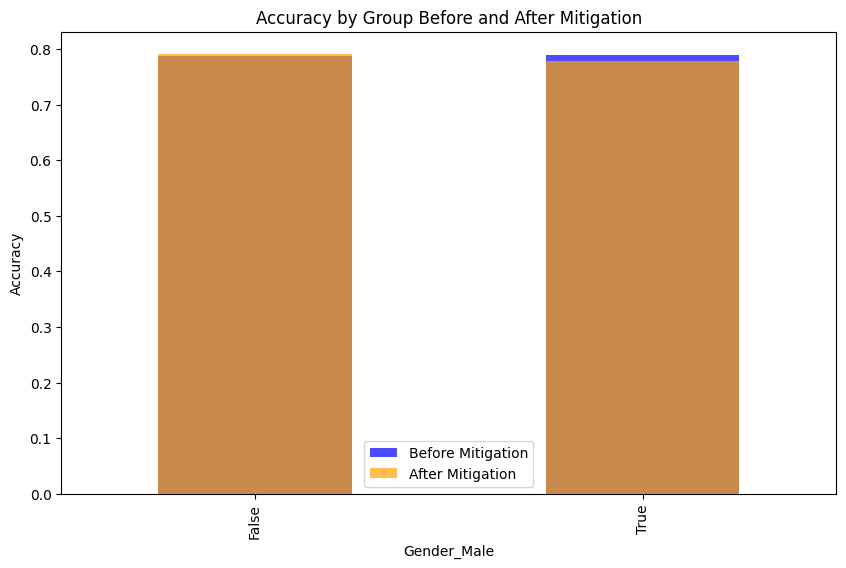

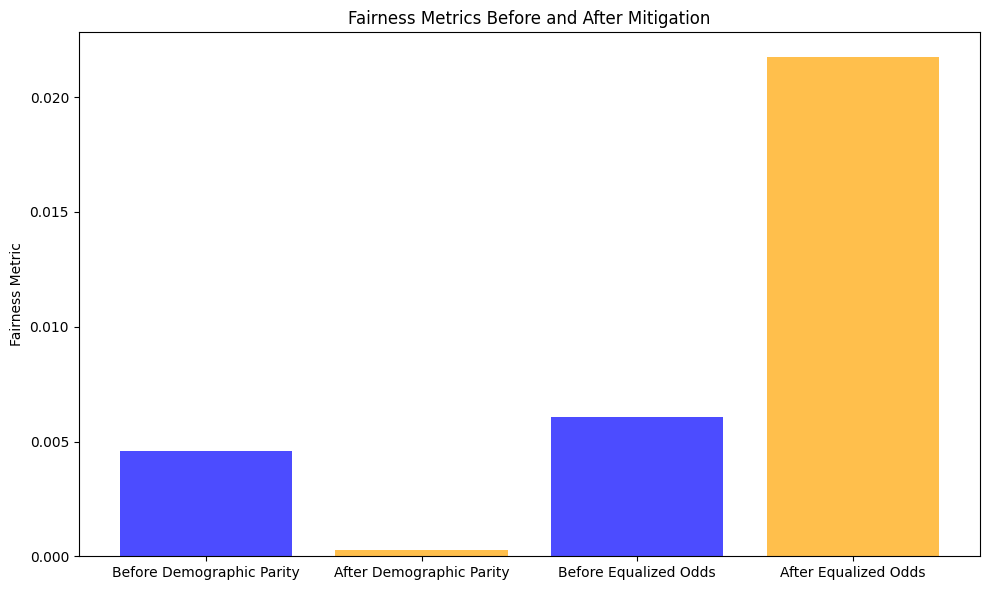

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
metric_frame.by_group.plot(kind='bar', ax=ax, label='Before Mitigation', color='blue', alpha=0.7)
metric_frame_mitigated.by_group.plot(kind='bar', ax=ax, label='After Mitigation', color='orange', alpha=0.7)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Group Before and After Mitigation')
ax.legend()

# Plot fairness metrics before and after mitigation
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['Before Demographic Parity', 'After Demographic Parity'],
       [dp_difference, dp_difference_mitigated], color=['blue', 'orange'], alpha=0.7)
ax.bar(['Before Equalized Odds', 'After Equalized Odds'],
       [eo_difference, eo_difference_mitigated], color=['blue', 'orange'], alpha=0.7)
ax.set_ylabel('Fairness Metric')
ax.set_title('Fairness Metrics Before and After Mitigation')

plt.tight_layout()
plt.show()

F1 Score: 0.86
Accuracy: 0.76


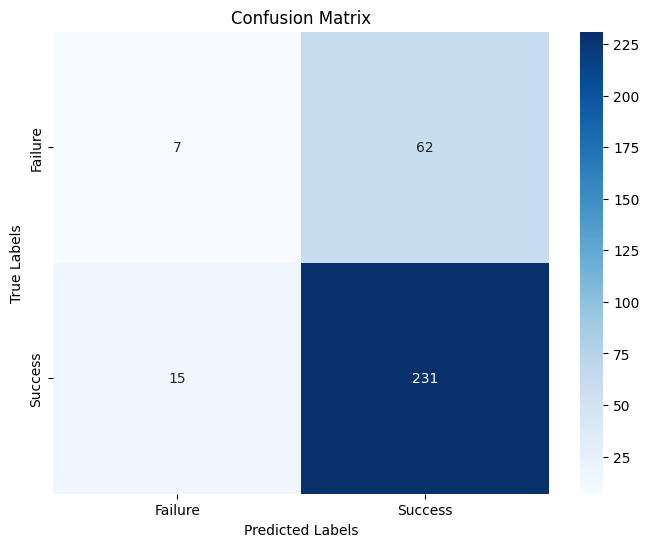

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
data = pd.read_csv('/content/augmented_personalized_medicine_fairness.csv')

# Map 'Outcome' column to binary values for classification
data['Outcome'] = data['Outcome'].map({'Success': 1, 'Failure': 0})

# Define features (using relevant columns) and labels
# Select features based on your dataset's structure (replace with columns available in your data)
X = data[['Age', 'Diagnosis', 'Treatment_Recommendation', 'Gender_Female', 'Ethnicity']]
y = data['Outcome']

# Convert categorical features to numeric (assuming 'Diagnosis' and 'Treatment_Recommendation' are categorical)
X = pd.get_dummies(X, columns=['Diagnosis', 'Treatment_Recommendation'], drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate F1 score and accuracy
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print F1 score and accuracy
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Failure', 'Success'],
            yticklabels=['Failure', 'Success'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


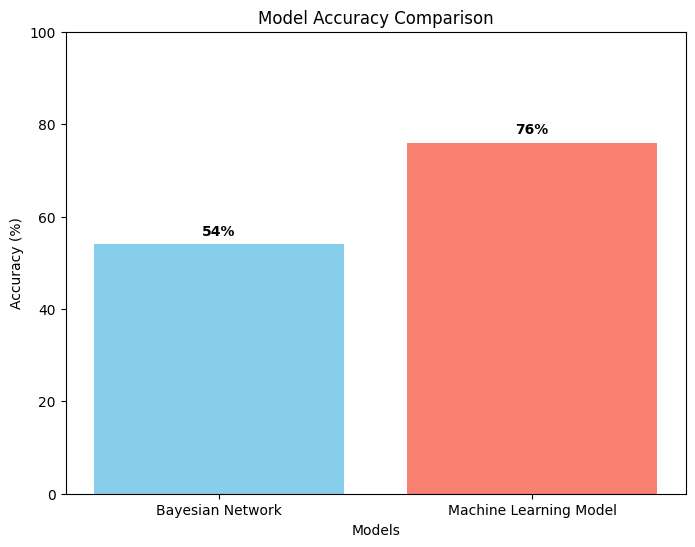

In [ ]:
import matplotlib.pyplot as plt

# Data for the models and their accuracy
models = ["Bayesian Network", "Machine Learning Model"]
accuracy = [54, 76]

# Plotting the comparison graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['skyblue', 'salmon'])
plt.ylim(0, 100)  # Setting the y-axis limit to 100 for percentage

# Adding title and labels
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")

# Adding accuracy values on top of the bars
for i, v in enumerate(accuracy):
    plt.text(i, v + 2, f"{v}%", ha='center', fontweight='bold')
